# Full Text Screening
**Author:** Jack Galbraith-Edge

In [232]:
# Import libraries
from msc_code.scripts.notebook_setup import *

In [233]:
# Import results that were included from Title and Abstract Review.
import_path = os.path.join(PROC_DATA_DIR, "title_abstract_review", "title_abstract_review_include_final.csv") # Define import path.
title_abstract_included = pd.read_csv(import_path) # Import CSV to Pandas Dataframe.

# Take 'id', 'Publication Year', 'Authors', 'Title', 'Publication Title', 'Database' colums to create a new dataframe.
full_text_review_start_df = title_abstract_included[['id', 'Publication Year', 'Authors', 'Title', 'Publication Title', 'Database']]

# Add 'Exclude', 'Reason ID' and 'Comments' columns.
full_text_review_start_df['Exclude'] = None
full_text_review_start_df['Reason ID'] = None
full_text_review_start_df['Comments'] = None

# View first five rows of dataframe
full_text_review_start_df.head()

# Save the dataframe to a CSV file for full text screening.
full_text_review_start_df.to_csv("/".join([PROC_DATA_DIR, "full_text_screen", "full_text_screen_start.csv"]), index=False)

/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_7302/2888286382.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_text_review_start_df['Exclude'] = None
/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_7302/2888286382.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_text_review_start_df['Reason ID'] = None
/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_7302/2888286382.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [234]:
# Define exclusion criteria:
exclusion_criteria = {
    1: "Full text not available in English.",
    2: "Studies not focusing on intentional ingestion of foreign object via the oral cavity (mouth).",
    3: "Studies focussing solely on accidental ingestion.",
    4: "Non-Human/Animal studies.",
    5: "Reviews, editorials, commentaries, and opinion pieces without original empirical data.",
    6: "Duplicate publications or studies with overlapping data sets (the most comprehensive or recent study will be included).",
    7: "Studies focusing on ingestion of substances (e.g. poisons, medications) rather than physical foreign objects.",
    8: "Ingestions undertaken in controlled environment as part of voluntary study.",
    9: "Ingestions not explicitly stated to be intentional."
}

In [235]:
# Troubleshoot errors in CSV encoding.

import_path = os.path.join(RAW_DATA_DIR, "full_text_screen", "full_text_screen_end_jge.csv")

# Identify the problematic line
with open(import_path, 'rb') as f:
    for i, line in enumerate(f):
        try:
            line.decode('utf-8')
        except UnicodeDecodeError:
            print(f"Error in line {i + 1}: {line}")
            break

In [236]:
# Reimport first author (JGE) screened results as pandas dataframe.
import_path = os.path.join(RAW_DATA_DIR, "full_text_screen", "full_text_screen_end_jge.csv")
jge_screened_df = pd.read_csv(import_path)

# Create dataframe of results not excluded in JGE full text screening.
jge_include = jge_screened_df[jge_screened_df['Exclude'] == False]

# Count number of results not excluded (included)
jge_include_count = len(jge_include)
print(f"Results screened and not excluded: {jge_include_count}")

# Create dataframe of results excluded in JGE full text screening. 
jge_excluded = jge_screened_df[jge_screened_df['Exclude'] == True]

# Count number of exclusions
jge_excluded_count = len(jge_excluded)

# Count number of unclear results
jge_excluded_unclear = jge_screened_df[(jge_screened_df['Exclude'] == True) & (jge_screened_df['Unclear'] == True)]
jge_excluded_unclear_count = len(jge_excluded_unclear)
print(f"Unclear exclusions excluded: {jge_excluded_unclear_count}")

# Count number of unclear paediatric exclusion
jge_exclude_paed_unclear = jge_screened_df[(jge_screened_df['Exclude'] == True) & (jge_screened_df['Unclear'] == True) & (jge_screened_df['Paediatric'] == True)]
jge_exclude_paed_unclear_count = len(jge_exclude_paed_unclear)
print(f"Unclear paediatric studies excluded: {jge_exclude_paed_unclear_count}")

# Count number of results where intention is unclear
jge_intention_unclear = jge_screened_df[jge_screened_df['Unclear'] == True]
jge_intention_unclear_count = len(jge_intention_unclear)
print(f"Intention was unclear in {jge_intention_unclear_count} results.")

# Create dataframe documenting exclusion reasoning
jge_excluded_reasoning = jge_excluded['Reason ID'].value_counts().rename('Count').reset_index()

# Map exclusion criteria category names to exclusion criteria Reason ID numerical values.
jge_excluded_reasoning['Reason'] = jge_excluded_reasoning['Reason ID'].map(exclusion_criteria)

# Print number of results excluded.
print(f"JGE excluded {jge_excluded_count} results during full text screening.")

# Create dataframe for items excluded without reason:
jge_exclude_no_reason = jge_excluded[(jge_excluded['Exclude'] == True ) & (jge_excluded['Reason ID'] == "NaN")]
jge_exclude_no_reason_count = len(jge_exclude_no_reason)
print(f"{jge_exclude_no_reason_count} records were excluded without a recorded reason.")
print(jge_exclude_no_reason if jge_exclude_no_reason_count > 0 else "All exclusions have reasons recorded.")

jge_excluded_reasoning

Results screened and not excluded: 94
Unclear exclusions excluded: 51
Unclear paediatric studies excluded: 33
Intention was unclear in 68 results.
JGE excluded 135 results during full text screening.
0 records were excluded without a recorded reason.
All exclusions have reasons recorded.


,Reason ID,Count,Reason
0,9.0,57,Ingestions not explicitly stated to be intenti...
1,1.0,24,Full text not available in English.
2,2.0,24,Studies not focusing on intentional ingestion ...
3,5.0,18,"Reviews, editorials, commentaries, and opinion..."
4,6.0,5,Duplicate publications or studies with overlap...
5,7.0,1,Studies focusing on ingestion of substances (e...


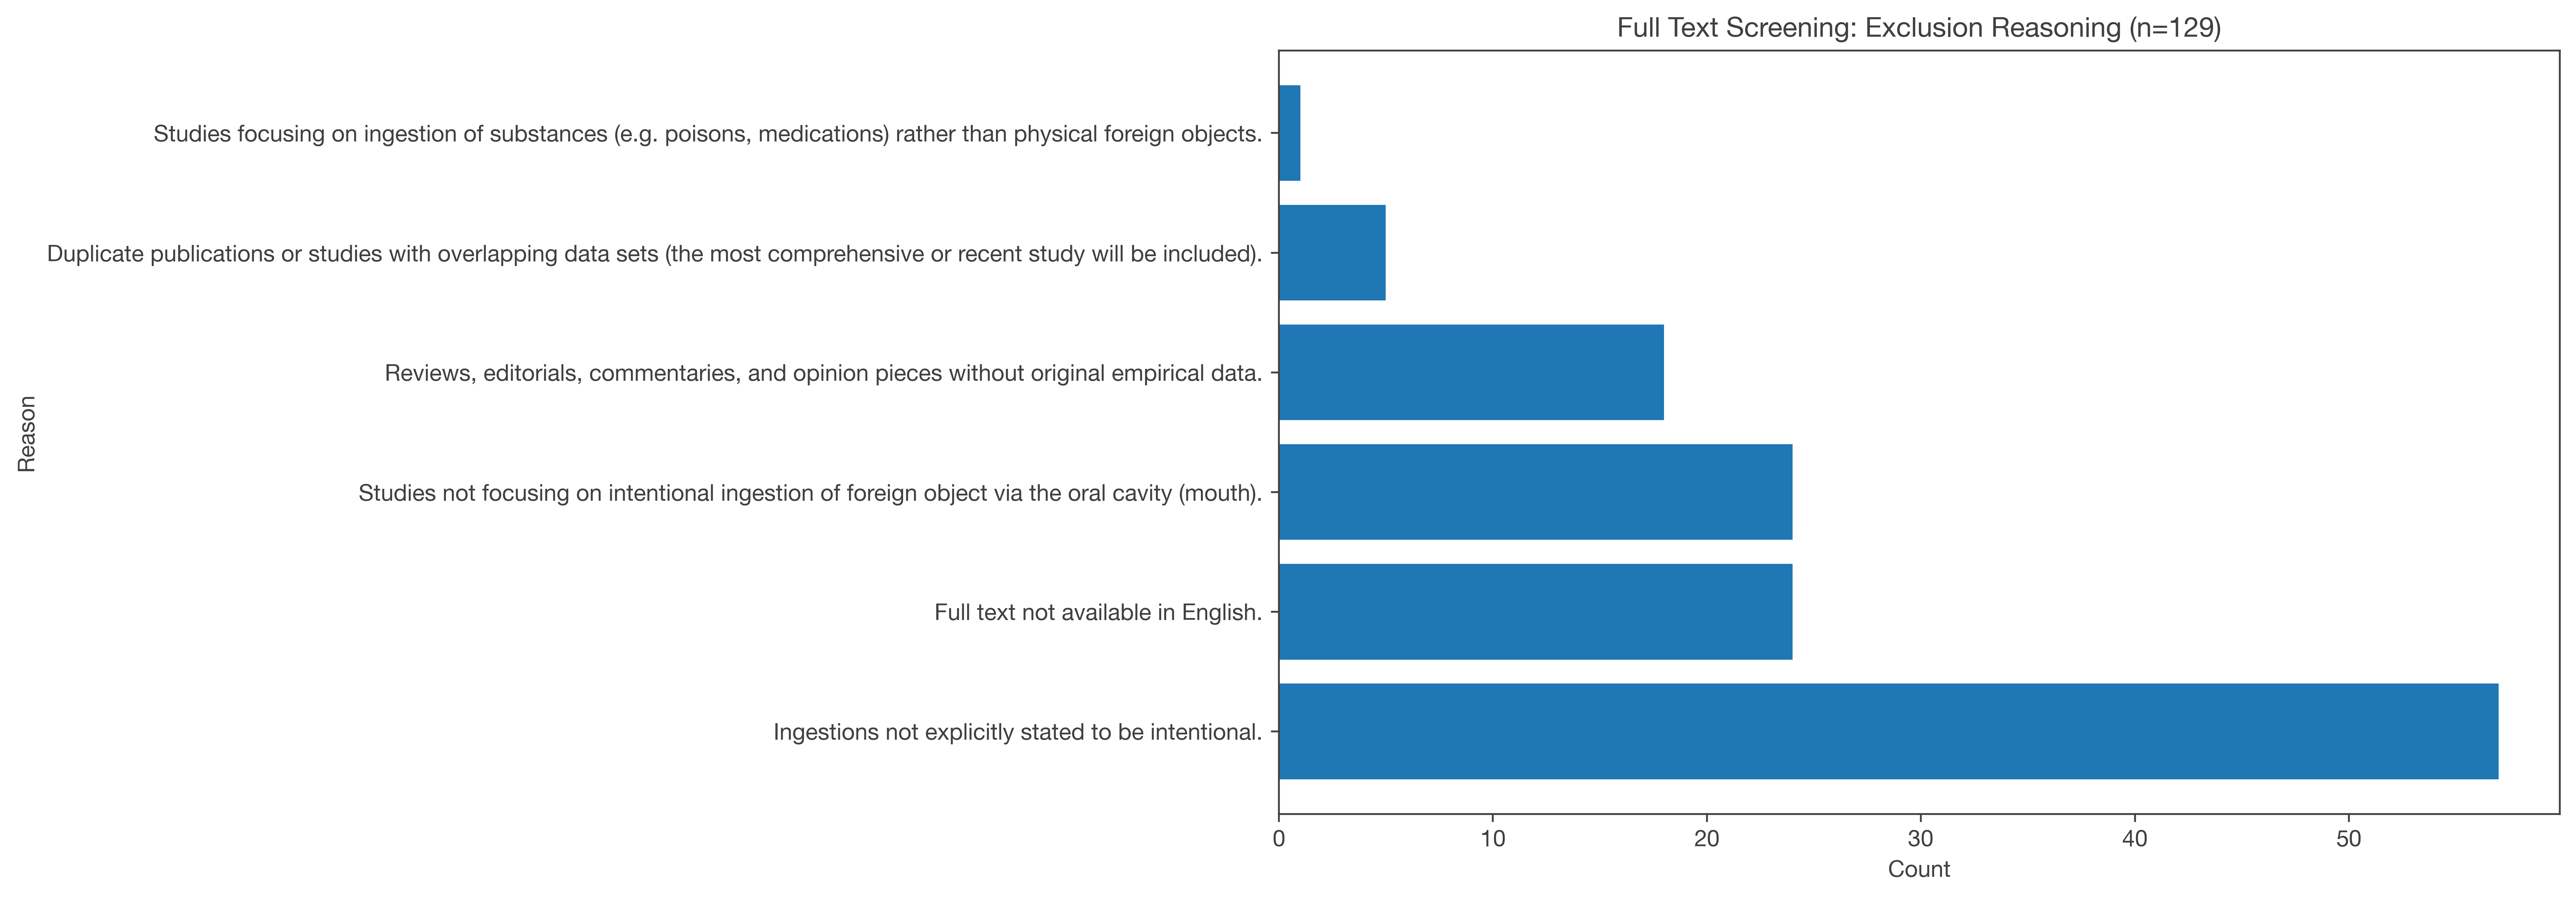

In [237]:
# Plot horizontal bar chart
plt.barh(y=jge_excluded_reasoning['Reason'],
         width=jge_excluded_reasoning['Count'])

# Plot labels
plt.xlabel("Count") # Y axis
plt.ylabel("Reason") # X axis
plt.title(f"Full Text Screening: Exclusion Reasoning (n={sum(jge_excluded_reasoning['Count'])})") # Title

# Show plot
plt.show()